<a href="https://colab.research.google.com/github/solharsh/All_Neural_Networks/blob/master/complete_keras_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras 
print(keras.__version__)

2.3.1


Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler #to normalize inputs
from sklearn.model_selection import train_test_split #divide data into test and train

import keras
from keras.models import Sequential #
from keras.layers import Dense

# fix random seed for reproducibility
seed = 155
np.random.seed(seed)

#  pima indians dataset is a standard machine learning dataset with the objective to predict diabetes sufferers. 
#It records various physiological measures of Pima Indians and whether subjects had developed diabetes. 

# download directly from github
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", 
                      header=None).values

dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=87) #75% train 25%test

In [0]:
#We just initialise our model and then sequentially add layers. Cross-entropy is commonly used in machine learning as a loss function.
#Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions.
#We are using Stochastic Gradient Descent as our optimizer.
#We don't explicitly create the input layer. Instead, we specify the number of neurons (or features) that feed into the first hidden layer.
#Our output has one neuron as it's a binary classification problem

np.random.seed(seed)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(5, input_dim=8, activation='relu')) # hidden layer1
my_first_nn.add(Dense(5, input_dim=8, activation='relu')) # hidden layer2 
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
#ModelCheckpoint, writes the model parameters to a file. 
#This allows us to track the improvements in the predictive accuracy of the model on the test set over epochs

from keras.callbacks import *
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/Capstone Project - NLP/AI_DL/nn_weights-{epoch:02d}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, 
                                             save_weights_only=False, save_best_only=False, mode='max')

In [0]:
# verbose=0 suppresses the file writing message
# note that the fit method expects a list of callbacks
#training the model
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=10, verbose=0, batch_size=X_train.shape[0],
                                      initial_epoch=0,callbacks=[checkpoint])

In [8]:
#[loss, accuracy] on training data
my_first_nn.evaluate(X_test, Y_test, verbose=0)

[5.947477579116821, 0.4427083432674408]

In [9]:
# training loss and accuracy over the first five epochs
[my_first_nn_fitted.history['loss'][0:5], my_first_nn_fitted.history['accuracy'][0:5]]

[[7.531370162963867,
  7.435224533081055,
  7.325822830200195,
  7.21171236038208,
  7.094968795776367],
 [0.4340278, 0.4357639, 0.4375, 0.4392361, 0.4392361]]

In [0]:
#Since we had save the model weights to a file at every epoch
#we can reproduce each intermediate model by loading the weights into an appropriately 
#constructed (i.e. same number of layers/neurons) neural network.

temp_test_model = Sequential() # create model
temp_test_model.add(Dense(5, input_dim=8, activation='relu')) # hidden layer1
temp_test_model.add(Dense(5, input_dim=8, activation='relu')) # hidden layer2
temp_test_model.add(Dense(1, activation='sigmoid')) # output layer
temp_test_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam is a variant of sgd
test_over_time = []
for i in range(1,len(my_first_nn_fitted.history['accuracy'])): #load weights and check the accuracy, loss
    temp_test_model.load_weights(f"/content/drive/My Drive/Capstone Project - NLP/AI_DL/nn_weights-%02d.hdf5" % i)
    scores = temp_test_model.evaluate(X_test, Y_test, verbose=0)
    # 0 is loss; 1 is accuracy
    test_over_time.append(scores)

Text(0, 0.5, 'Accuracy')

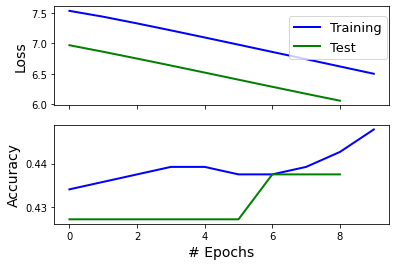

In [11]:
#to plot loss and accuraccy with respect to epochs

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(len(my_first_nn_fitted.history['loss'])), my_first_nn_fitted.history['loss'],linestyle='-', color='blue',label='Training', lw=2)
ax1.plot(range(len(np.array(test_over_time)[:,0])), np.array(test_over_time)[:,0], linestyle='-', color='green',label='Test', lw=2)
ax2.plot(range(len(my_first_nn_fitted.history['accuracy'])), my_first_nn_fitted.history['accuracy'],linestyle='-', color='blue',label='Training', lw=2)
ax2.plot(range(len(np.array(test_over_time)[:,1])), np.array(test_over_time)[:,1], linestyle='-', color='green',label='Test', lw=2)
leg = ax1.legend(bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0.,fontsize=13)
ax1.set_xticklabels('')
#ax1.set_yscale('log')
ax2.set_xlabel('# Epochs',fontsize=14)
ax1.set_ylabel('Loss',fontsize=14)
ax2.set_ylabel('Accuracy',fontsize=14)

In [0]:
#wrap the model construction and performance evaluation in a function

def runNN(X_train_set, Y_train_set, X_test_set, Y_test_set, n_neurons, n_epochs, seed=155,
          history=True, del_files=True, validation_split=0.2, early_stopping=None):
    np.random.seed(seed)
    nn_model = Sequential() # create model
    nn_model.add(Dense(n_neurons, input_dim=X_train_set.shape[1], activation='relu')) # hidden layer
    nn_model.add(Dense(1, activation='sigmoid')) # output layer
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_callbacks = []
    if early_stopping is not None:
        model_callbacks = [early_stopping]
    if history:
        filepath="/content/drive/My Drive/Capstone Project - NLP/AI_DL/nn_weights_%dneurons-{epoch:02d}.hdf5" %n_neurons
        checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_weights_only=True,
                                     save_best_only=False, mode='max')
        model_callbacks.append(checkpoint)
        output = nn_model.fit(X_train_set, Y_train_set, epochs=n_epochs, verbose=0, 
                              batch_size=X_train_set.shape[0],callbacks=model_callbacks, 
                              initial_epoch=0, validation_split=validation_split).history
        time.sleep(0.1) # hack so that files can be opened in subsequent code
        temp_val_model = Sequential() # create model
        temp_val_model.add(Dense(n_neurons, input_dim=8, activation='relu')) # hidden layer
        temp_val_model.add(Dense(1, activation='sigmoid')) # output layer
        temp_val_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        test_over_time = []
        for i in range(1,len(output['loss'])):
            temp_val_model.load_weights("/content/drive/My Drive/Capstone Project - NLP/AI_DL/nn_weights_%dneurons-%02d.hdf5" % (n_neurons,i))
           # print("/content/gdrive/My Drive/checkpoints/nn_weights_%dneurons-{epoch:02d}.hdf5" %(n_neurons,i))
            scores = temp_val_model.evaluate(X_test_set, Y_test_set, verbose=0)
            test_over_time.append(scores)
            # delete files once we're done with them
            if del_files:
                os.remove("/content/drive/My Drive/Capstone Project - NLP/AI_DL/nn_weights_%dneurons-%02d.hdf5" %(n_neurons,i))
        test_over_time = np.array(test_over_time)
        output['test_loss'] = [row[0] for row in test_over_time]
        output['test_acc'] = [row[1] for row in test_over_time]
    else:
        model_output = nn_model.fit(X_train_set, Y_train_set, epochs=n_epochs, verbose=0,
                              batch_size=X_train_set.shape[0],initial_epoch=0,callbacks=model_callbacks,
                              validation_split=validation_split)
        validation_size = 0 #include validation
        output = {}
        if validation_split>0: #if user wants to include validation data
            validation_scores = nn_model.evaluate(model_output.validation_data[0],  #evaluate model loss and acc on validation data
                                             model_output.validation_data[1], verbose=0)
            validation_size = model_output.validation_data[0].shape[0]
            output['validation_loss'] = validation_scores[0]
            output['validation_acc'] = validation_scores[1]
        training_size = X_train.shape[0] - validation_size #remove validation data from training data
        train_scores = nn_model.evaluate(X_train_set[0:training_size], #check loss and acc on training data
                                         Y_train_set[0:training_size], verbose=0)
        test_scores = nn_model.evaluate(X_test_set, Y_test_set, verbose=0) #check loss and acc on test data
        output['train_loss'] = train_scores[0]
        output['train_acc'] = train_scores[1]
        output['test_loss'] = test_scores[0]
        output['test_acc'] = test_scores[1]
    return output

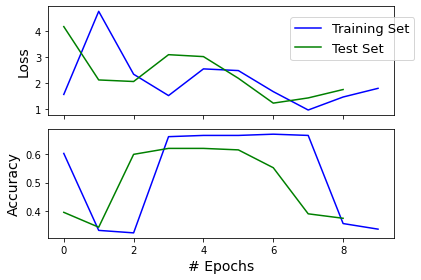

In [13]:
#to plot loss and accuracy on training and test data
my_second_nn = runNN(X_train, Y_train, X_test, Y_test, 1000, 10)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(len(my_second_nn['loss'])),my_second_nn['loss'], color='blue',label='Training Set', lw=1.5)
ax1.plot(range(len(my_second_nn['test_loss'])),my_second_nn['test_loss'], color='green',label='Test Set', lw=1.5)
ax2.plot(range(len(my_second_nn['accuracy'])),my_second_nn['accuracy'], color='blue',label='Training Set', lw=1.5)
ax2.plot(range(len(my_second_nn['test_acc'])),my_second_nn['test_acc'], color='green',label='Test Set', lw=1.5)
leg = ax1.legend(bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0.,fontsize=13)
ax1.set_xticklabels('')
ax2.set_xlabel('# Epochs',fontsize=14)
ax1.set_ylabel('Loss',fontsize=14)
ax2.set_ylabel('Accuracy',fontsize=14)
plt.tight_layout()
plt.show()

In [0]:
#Scaling/normalising the data traditionally involves linear transformation to force all values within a specific interval (e.g. between 0 and 1)
#while standardising typically transforms the inputs to have the mean centred on zero with unit variance
#you should scale/normalise the training and test sets separately. 
#Otherwise, you'd be using information from your test set to inform your model training

scaler = StandardScaler() #invoke keras scaling function
nn_output_unscaled = runNN(X_train, Y_train, X_test, Y_test, 1000, 10) #output on unscaled data
nn_output_scaled = runNN(scaler.fit_transform(X_train), Y_train, 
                         scaler.fit_transform(X_test), Y_test, 1000, 10) #output on scaled data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


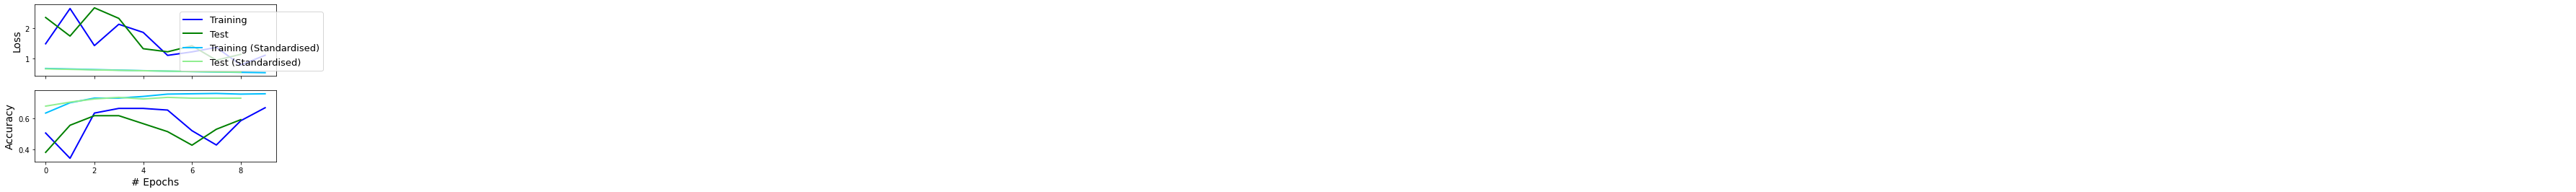

In [15]:
#view model parameters for both scaled and unscaled train and test data

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(len(nn_output_unscaled['loss'])), nn_output_unscaled['loss'], linestyle='-', color='blue',label='Training', lw=2)
ax1.plot(range(len(nn_output_unscaled['test_loss'])), nn_output_unscaled['test_loss'], linestyle='-', color='green',label='Test', lw=2)
ax1.plot(range(len(nn_output_scaled['loss'])), nn_output_scaled['loss'], linestyle='-', color='deepskyblue',label='Training (Standardised)', lw=2)
ax1.plot(range(len(nn_output_scaled['test_loss'])), nn_output_scaled['test_loss'], linestyle='-', color='lightgreen',label='Test (Standardised)', lw=2)
ax2.plot(range(len(nn_output_unscaled['accuracy'])), nn_output_unscaled['accuracy'], linestyle='-', color='blue',label='Training', lw=2)
ax2.plot(range(len(nn_output_unscaled['test_acc'])), nn_output_unscaled['test_acc'], linestyle='-', color='green',label='Test', lw=2)
ax2.plot(range(len(nn_output_scaled['accuracy'])), nn_output_scaled['accuracy'], linestyle='-', color='deepskyblue',label='Training (Standardised)', lw=2)
ax2.plot(range(len(nn_output_scaled['test_acc'])), nn_output_scaled['test_acc'], linestyle='-', color='lightgreen',label='Test (Standardised)', lw=2)
leg = ax1.legend(bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=0.,fontsize=13)
ax1.set_xticklabels('')
ax2.set_xlabel('# Epochs',fontsize=14)
ax1.set_ylabel('Loss',fontsize=14)
ax2.set_ylabel('Accuracy',fontsize=14)
ax2.annotate('Overfitting starts', xy=(80, 0.8), xytext=(100, 0.5),fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.0,headwidth=10))
plt.tight_layout()
plt.show()

In [16]:
#acc on scaled data
nn_output_scaled['accuracy'][-1]

0.76304346

In [0]:
#We include validation set now.
#As long as the validation error is decreasing, the model can continue to fine tune its parameters.
#   monitor: quantity to be monitored.
#    min_delta: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
#    patience: number of epochs that produced the monitored quantity with no improvement after which training will be stopped. Validation quantities may not be produced for every epoch, if the validation frequency (model.fit(validation_freq=5)) is greater than one.
#    verbose: verbosity mode.
#    mode: one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
#    baseline: Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline.
#    restore_best_weights: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

early_stop_crit = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, 
                                                patience=20, verbose=0, mode='auto')
nn_output_unscaled = runNN(X_train, Y_train, X_test, Y_test, 1000, 10,
                                         validation_split=0.2, early_stopping=early_stop_crit) #output on unscaled validated set
nn_output_scaled = runNN(scaler.fit_transform(X_train), Y_train, scaler.fit_transform(X_test), 
                         Y_test, 1000, 10,validation_split=0.2, early_stopping=early_stop_crit) #output on scaled validated set

KeyError: ignored

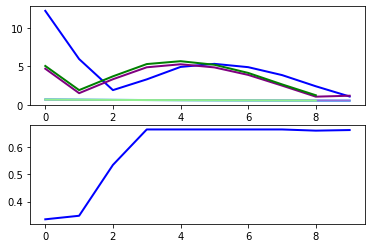

In [18]:
#plot loss and acc unscaled Tr/V/Te and scaled Tr/V/Te
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(len(nn_output_unscaled['loss'])), nn_output_unscaled['loss'], linestyle='-', color='blue',label='Training', lw=2)
ax1.plot(range(len(nn_output_unscaled['val_loss'])), nn_output_unscaled['val_loss'], linestyle='-', color='purple',label='Validation', lw=2)
ax1.plot(range(len(nn_output_unscaled['test_loss'])), nn_output_unscaled['test_loss'],linestyle='-', color='green',label='Test', lw=2)
ax1.plot(range(len(nn_output_scaled['loss'])), nn_output_scaled['loss'], linestyle='-', color='deepskyblue',label='Training (Standardised)', lw=2)
ax1.plot(range(len(nn_output_scaled['val_loss'])), nn_output_scaled['val_loss'], linestyle='-', color='mediumpurple',label='Validation (Standardised)', lw=2)
ax1.plot(range(len(nn_output_scaled['test_loss'])), nn_output_scaled['test_loss'], linestyle='-', color='lightgreen',label='Test (Standardised)', lw=2)
ax2.plot(range(len(nn_output_unscaled['accuracy'])), nn_output_unscaled['accuracy'], linestyle='-', color='blue',label='Training', lw=2)
ax2.plot(range(len(nn_output_unscaled['val_acc'])), nn_output_unscaled['val_acc'], linestyle='-', color='purple',label='Validation', lw=2)
ax2.plot(range(len(nn_output_unscaled['test_acc'])), nn_output_unscaled['test_acc'],linestyle='-', color='green',label='Test', lw=2)
ax2.plot(range(len(nn_output_scaled['accuracy'])), nn_output_scaled['accuracy'], linestyle='-', color='deepskyblue',label='Training (Standardised)', lw=2)
ax2.plot(range(len(nn_output_scaled['val_acc'])), nn_output_scaled['val_acc'], linestyle='-', color='mediumpurple',label='Validation (Standardised)', lw=2)
ax2.plot(range(len(nn_output_scaled['test_acc'])), nn_output_scaled['test_acc'], linestyle='-', color='lightgreen',label='Test (Standardised)', lw=2)
leg = ax1.legend(bbox_to_anchor=(0.5, 0.95), loc=2, borderaxespad=0.,fontsize=13)
ax1.set_xticklabels('')
ax2.set_xlabel('# Epochs',fontsize=14)
ax1.set_ylabel('Loss',fontsize=14)
ax2.set_ylabel('Accuracy',fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
#We can run multiple models with varying number of nodes (which we specify) 
#and accept the version that performs best on the validation set. This is known as grid search

my_grid=[2,3,5,10,20,50,100,200,500,1000,5000] #number of nodes in a layer
nn_outputs = []
nn_outputs_early = []
early_stop_crit = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, 
                                                patience=20, verbose=0, mode='auto')
for i in my_grid: #check loss on different nodes in a layer
    print(i)
    nn_output_unscaled = runNN(X_train, Y_train, X_test, Y_test, i, 10, history=False)
    nn_output_scaled = runNN(scaler.fit_transform(X_train), Y_train,
                              scaler.fit_transform(X_test), Y_test, i, 10, history=False)
    nn_output_unscaled_early = runNN(X_train, Y_train, X_test, Y_test, i, 10, history=False,
                                   validation_split=0.2, early_stopping=early_stop_crit)
    nn_output_scaled_early = runNN(scaler.fit_transform(X_train), Y_train,
                                   scaler.fit_transform(X_test), Y_test, i, 10, history=False,
                                   validation_split=0.2, early_stopping=early_stop_crit)
    nn_outputs.append([i, nn_output_unscaled['train_loss'],nn_output_unscaled['test_loss'], 
                       nn_output_scaled['train_loss'], nn_output_scaled['test_loss']])
    nn_outputs_early.append([i, nn_output_unscaled_early['train_loss'],nn_output_unscaled_early['validation_loss'],
                             nn_output_unscaled_early['test_loss'], nn_output_scaled_early['train_loss'], 
                             nn_output_scaled_early['validation_loss'], nn_output_scaled_early['test_loss']])
nn_outputs = np.array(nn_outputs)   
nn_outputs_early = np.array(nn_outputs_early)

2
3
5
10
20
50
100
200
500
1000
5000


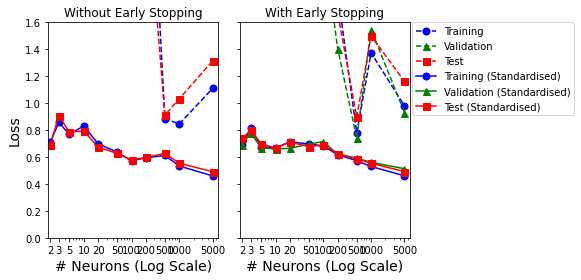

In [20]:
#plot loss vs num. of neurons for validation and without validation

import matplotlib.ticker
from matplotlib.ticker import NullFormatter

fig1, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(nn_outputs[:,0], nn_outputs[:,1], '--bo',label='Training', ms=7)
ax1.plot(nn_outputs[:,0], nn_outputs[:,2],  '--rs',label='Test', ms=7)
ax1.plot(nn_outputs[:,0], nn_outputs[:,3], '-bo',label='Training (Standardised)', ms=7)
ax1.plot(nn_outputs[:,0], nn_outputs[:,4],  '-rs',label='Test (Standardised)', ms=7)
ax1.set_xscale('log')
ax1.set_xticks([2,3,5,10,20,50,100,200,500,1000,5000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylim([0,1.6])
ax1.set_xlim([1.8,6500])
ax1.set_ylabel('Loss',size=14)
ax2.plot(nn_outputs_early[:,0], nn_outputs_early[:,1], '--bo',label='Training', ms=7)
ax2.plot(nn_outputs_early[:,0], nn_outputs_early[:,2],  '--g^',label='Validation', ms=7)
ax2.plot(nn_outputs_early[:,0], nn_outputs_early[:,3], '--rs',label='Test', ms=7)
ax2.plot(nn_outputs_early[:,0], nn_outputs_early[:,4],  '-bo',label='Training (Standardised)', ms=7)
ax2.plot(nn_outputs_early[:,0], nn_outputs_early[:,5], '-g^',label='Validation (Standardised)', ms=7)
ax2.plot(nn_outputs_early[:,0], nn_outputs_early[:,6],  '-rs',label='Test (Standardised)', ms=7)
ax2.set_xscale('log')
ax2.set_xticks([2,3,5,10,20,50,100,200,500,1000,5000])
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_ylim([0,1.6])
ax2.set_xlim([1.8,6500])
ax1.set_xlabel('# Neurons (Log Scale)',size=14)
ax2.set_xlabel('# Neurons (Log Scale)',size=14)
ax1.set_title('Without Early Stopping')
ax2.set_title('With Early Stopping')
ax2.yaxis.set_major_formatter(NullFormatter())
plt.tight_layout()
ax2.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [21]:
# number of neurons with lowest validation loss on the standardised inputs
my_grid[np.argmin(nn_outputs_early[:,5])]

5000

In [22]:
#k-fold cross validation
#run the model five times, taking non-overlapping 20% chunks for the validation set each time(validation_split). 
#The hyperparameter with the lowest average loss (or highest average accuracy, if you prefer) across those folds is deemed the winner.

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
all_kfolds_results=[]
for grid_vals in my_grid:
    kfolds_results = []
    print(grid_vals)
    for train_set, validation_set in kfold.split(X_train, Y_train):
        kfolds_results.append(runNN(scaler.fit_transform(X_train[train_set]), Y_train[train_set],
                                    scaler.fit_transform(X_train[validation_set]), Y_train[validation_set],
                                    grid_vals, 10, history=False, validation_split=0.2,
                                    early_stopping=early_stop_crit)['test_loss'])
    all_kfolds_results.append(kfolds_results)

2
3
5
10
20
50
100
200
500
1000
5000


In [23]:
my_grid[np.argmin(np.mean(all_kfolds_results,axis=1))]

5000

In [24]:
# it's good practice to compare your models across a number of different splits (repeated cross-validation).

from sklearn.model_selection import RepeatedStratifiedKFold
# repeated stratified cross-validation
# only available with scikit-learn v0.19.0
# check your version:
# print('The scikit-learn version is {}.'.format(sklearn.__version__))
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=seed) #Number of folds = 5. Number of times cross-validator needs to be repeated = 4
all_kfolds_results = []
for grid_vals in my_grid:
    kfolds_results = []
    print(grid_vals)
    for train_set, validation_set in rkf.split(X_train, Y_train):
        kfolds_results.append(runNN(scaler.fit_transform(X_train[train_set]), Y_train[train_set],
                                        scaler.fit_transform(X_train[validation_set]), Y_train[validation_set],
                                        grid_vals, 10, history=False, validation_split=0.2,
                                        early_stopping=early_stop_crit)['test_loss'])
    all_kfolds_results.append(kfolds_results)
#all_kfolds_results = np.load('all_kfolds_results_repeat_xval.npy')

2
3
5
10
20
50
100
200
500
1000
5000


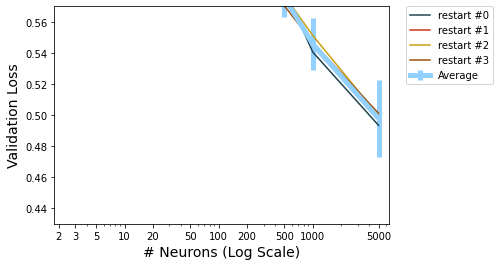

In [25]:
#plot loss vs num of neurons

import matplotlib.ticker
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
for i, my_col in zip(range(4),['#1E434C','#ce3618','#C99E10','#9B4F0F']):
    plt.plot(my_grid, np.mean(np.array(all_kfolds_results)[:,range(i*5,(i+1)*5)],axis=1), 
                 label='restart #%d'%i, ms=7, color=my_col)
plt.errorbar(my_grid, np.mean(np.array(all_kfolds_results),axis=1), 
                 yerr=np.std(np.array(all_kfolds_results),axis=1),label='Average', ms=20,lw=5,color='#91d0ff')
plt.xscale('log')
plt.xticks([2,3,5,10,20,50,100,200,500,1000,5000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylim([0.43,0.57])
ax1.set_xlim([1.8,6500])
ax1.set_xlabel('# Neurons (Log Scale)',size=14)
ax1.set_ylabel('Validation Loss',size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [26]:
#optimal number of neurons
my_grid[np.argmin(np.mean(np.array(all_kfolds_results),axis=1))]

5000